# Quasi-Random Sequence Generator Comparison

QMCPy's low-discrepancy-sequence generators are built upon generators developed by
1. D. Nuyens, *The Magic Point Shop of QMC point generators and generating vectors.*<br>
MATLAB and Python software, 2018. Available from https://people.cs.kuleuven.be/~dirk.nuyens/
2. PyTorch: An Imperative Style, High-Performance Deep Learning Library. Paszke, Adam and Gross, Sam and Massa, Francisco and Lerer, Adam and Bradbury, James and Chanan, Gregory and Killeen, Trevor and Lin, Zeming and Gimelshein, Natalia and Antiga, Luca and Desmaison, Alban and Kopf, Andreas and Yang, Edward and DeVito, Zachary and Raison, Martin and Tejani, Alykhan and Chilamkurthy, Sasank and Steiner, Benoit and Fang, Lu and Bai, Junjie and Chintala, Soumith. Advances in Neural Information Processing Systems 32. H. Wallach and H. Larochelle and A. Beygelzimer and F. d\textquotesingle Alch\'{e}-Buc and E. Fox and R. Garnett. Pages 8024--8035. 2019. Curran Associates, Inc.http://papers.neurips.cc/paper/9015-pytorch-an-imperative-style-high-performance-deep-learning-library.pdf

In [1]:
from qmcpy import *

import pandas as pd
pd.options.display.float_format = '{:.2e}'.format

from numpy import *

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


## General Lattice & Sobol Generator Usage
The following example uses the `Lattice` object to generate samples.<br>
The same code works when replacing `Lattice` with `Sobol`

In [2]:
# Unshifted Samples
lattice_gen = Lattice(rng_seed=7)
unshifted_samples = lattice_gen.gen_dd_samples(replications=1, n_samples=4, dimensions=2, scramble=False)
print('Shape:',unshifted_samples.shape)
print('Samples:\n'+str(unshifted_samples))

Shape: (1, 4, 2)
Samples:
[[[ 0.000  0.000]
  [ 0.500  0.500]
  [ 0.250  0.750]
  [ 0.750  0.250]]]


In [3]:
# Shifted Samples
lattice_gen = Lattice(rng_seed=7)
shifted_samples = lattice_gen.gen_dd_samples(replications=2, n_samples=2, dimensions=3) # defaults scramble=True
print('Shape:',shifted_samples.shape)
print('Samples:\n'+str(shifted_samples))

Shape: (2, 2, 3)
Samples:
[[[ 0.625  0.897  0.776]
  [ 0.125  0.397  0.276]]

 [[ 0.225  0.300  0.874]
  [ 0.725  0.800  0.374]]]


In [4]:
# Next Shifted Samples from same Lattice instance
next_shifted_samples = lattice_gen.gen_dd_samples(replications=2, n_samples=2, dimensions = 3)
print('Shape:',next_shifted_samples.shape)
print('Samples:\n'+str(next_shifted_samples))

Shape: (2, 2, 3)
Samples:
[[[ 0.875  0.647  0.526]
  [ 0.375  0.147  0.026]]

 [[ 0.475  0.050  0.624]
  [ 0.975  0.550  0.124]]]


In [5]:
next_next_shifted_samples = lattice_gen.gen_dd_samples(replications=2, n_samples=4, dimensions = 3)
print('Shape:',next_next_shifted_samples.shape)
print('Samples:\n'+str(next_next_shifted_samples))

Shape: (2, 4, 3)
Samples:
[[[ 0.750  0.272  0.151]
  [ 0.000  0.022  0.901]
  [ 0.250  0.772  0.651]
  [ 0.500  0.522  0.401]]

 [[ 0.350  0.675  0.249]
  [ 0.600  0.425  0.999]
  [ 0.850  0.175  0.749]
  [ 0.100  0.925  0.499]]]


Once replications and dimensions are set in the first call to gen_dd_samples, they are enforced in following calls.<br> 
The first call to gen_dd_samples can take any n_samples = $2^i$. However, following calls require n_samples to be $2^i$ then $2^{i+1}$ then $2^{i+2}$ then ... <br>
Rerunning the previous 3 blocks with different parameters may help clarify. 

## *Magic Point Shop* Generators vs QMCPy Generators
In an effort to improve the generators speed, QMCPy developers modified the algorithms developed in *The Magic Point Shop*.<br>
The following blocks visualize the speed improvement of QMCPy when generating <b> 1 dimensional</b> unshifted/unscrambled sequences.<br>
Data for the following plots can be generated by running
~~~
python workouts/wo_lds_sequences/mps_original_vs_qmcpy.py
~~~

In [6]:
df_mps = pd.read_csv('../outputs/lds_sequences/magic_point_shop_times.csv')
df_mps.set_index('n')

mps_lattice_time  qmcpy_lattice_time  mps_Sobol_time  \
n                                                                
2.00e+00          3.85e-05            8.21e-05        7.80e-01   
4.00e+00          6.10e-05            7.72e-05        7.77e-01   
8.00e+00          6.99e-05            8.92e-05        7.98e-01   
1.60e+01          1.31e-04            8.97e-05        8.32e-01   
3.20e+01          2.60e-04            1.14e-04        7.49e-01   
6.40e+01          4.87e-04            1.24e-04        7.29e-01   
1.28e+02          8.80e-04            1.26e-04        7.29e-01   
2.56e+02          1.61e-03            1.38e-04        7.38e-01   
5.12e+02          3.43e-03            2.48e-04        7.35e-01   
1.02e+03          6.58e-03            1.90e-04        7.35e-01   
2.05e+03          1.26e-02            1.88e-04        7.45e-01   
4.10e+03          2.38e-02            2.26e-04        7.51e-01   
8.19e+03          4.72e-02            2.91e-04        7.76e-01   
1.64e+04          9.26e-02            4.27e-04        8.17e-01   
3.28e+04          1.93e-01            6.54e-04        8.87e-01   
6.55e+04          3.87e-01            1.06e-03        1.05e+00   
1.31e+05          7.73e-01            1.92e-03        1.36e+00   
2.62e+05          1.57e+00            3.67e-03        1.98e+00   
5.24e+05          3.15e+00            7.64e-03        3.22e+00   
1.05e+06          6.29e+00            1.53e-02        5.74e+00   

          qmcpy_Sobol_time  
n                           
2.00e+00          4.77e-03  
4.00e+00          2.82e-03  
8.00e+00          2.89e-03  
1.60e+01          2.79e-03  
3.20e+01          2.84e-03  
6.40e+01          2.92e-03  
1.28e+02          3.04e-03  
2.56e+02          3.36e-03  
5.12e+02          3.88e-03  
1.02e+03          4.79e-03  
2.05e+03          6.86e-03  
4.10e+03          1.09e-02  
8.19e+03          1.94e-02  
1.64e+04          3.58e-02  
3.28e+04          6.84e-02  
6.55e+04          1.37e-01  
1.31e+05          2.69e-01  
2.62e+05          5.33e-01  
5.24e+05          1.07e+00  
1.05e+06          2.13e+00

In [7]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
n = df_mps.n
suf_lattice = df_mps.mps_lattice_time.values / df_mps.qmcpy_lattice_time.values
suf_Sobol = df_mps.mps_Sobol_time.values / df_mps.qmcpy_Sobol_time.values
ax.loglog(n, suf_lattice, label='Lattice', color='b')
ax.loglog(n, suf_Sobol, label='Sobol', color='g')
ax.legend(loc='center left')
ax.set_xlabel('Sampling Points')
ax.set_ylabel('Speed-Up Factor')
fig.suptitle('Speed Improvement of QMCPy to Magic Point Shop Generators')
plt.savefig('../outputs/lds_sequences/mps_vs_qmcpy_generators.png', dpi=200)

## MATLAB vs R vs Python Generator Speed
Compare the speed of low-discrepancy-sequence generators from MATLAB, R,  and Python.<br>
The following blocks visualize a speed comparison with MATLAB when generating <b> 1 dimensional</b> shifted/scrambled sequences. Note that the generators are reinitialized before every trial. <br>
Python data for the following plots can be generated by running
~~~
python workouts/wo_lds_sequences/qmcpy_sequences.py
~~~
MATLAB data can be generated by running the file at `workouts/wo_lds_sequences/matlab_sequences.py`
R data can be generated by running the file at `workouts/wo_lds_sequences/r_sequences.py`
<b>Notes</b>
- For Python, generators are part of the QMCPy package and located at `qmcpy/discrete_distribution/`
- For MATLAB, the Sobol generator is built in, while the lattice generator is part of the GAIL package:
    - Sou-Cheng T. Choi, Yuhan Ding, Fred J. Hickernell, Lan Jiang, Lluis Antoni Jimenez Rugama, Da Li, Jagadeeswaran Rathinavel, Xin Tong, Kan Zhang, Yizhi Zhang, and Xuan Zhou, GAIL: Guaranteed Automatic Integration Library (Version 2.3) [MATLAB Software], 2019. Available from http://gailgithub.github.io/GAIL_Dev/
    - lattice_gen from: https://github.com/GailGithub/GAIL_Dev/blob/master/Algorithms/%2Bgail/lattice_gen.m
- For R, the Sobol generator is part of the qrng package
    - Marius Hofert and Christiane Lemieux (2019). qrng: (Randomized)<br>Quasi-Random Number Generators. R package version 0.0-7.<br>
  https://CRAN.R-project.org/package=qrng


In [8]:
df_matlab = pd.read_csv('../outputs/lds_sequences/matlab_sequence_times.csv', header=None)
df_matlab.columns = ['n', 'matlab_Lattice_time', 'matlab_Sobol_time']
df_python = pd.read_csv('../outputs/lds_sequences/python_sequence_times.csv')
df_python.columns = ['n', 'python_Lattice_time', 'python_Sobol_MPS_time', 'python_Sobol_Pytorch_time']
df_r = pd.read_csv('../outputs/lds_sequences/r_sequence_times.csv',sep=' ')
df_r.columns = ['n','r_Sobol_time']
df_r.reset_index(drop=True, inplace=True)
df_languages = pd.concat([df_matlab['n'], 
    df_matlab['matlab_Lattice_time'], df_python['python_Lattice_time'],\
    df_matlab['matlab_Sobol_time'], df_r['r_Sobol_time'], \
    df_python['python_Sobol_MPS_time'], df_python['python_Sobol_Pytorch_time']],  
    axis = 1)
df_languages.set_index('n')

matlab_Lattice_time  python_Lattice_time  matlab_Sobol_time  \
n                                                                       
2.00e+00             3.76e-04             1.91e-04           6.36e-04   
4.00e+00             2.23e-04             1.72e-04           3.91e-04   
8.00e+00             1.54e-04             2.45e-04           3.68e-04   
1.60e+01             1.59e-04             2.40e-04           9.57e-04   
3.20e+01             1.68e-04             2.51e-04           4.58e-04   
6.40e+01             1.60e-04             2.82e-04           5.07e-04   
1.28e+02             1.60e-04             2.34e-04           4.09e-04   
2.56e+02             1.72e-04             2.94e-04           2.84e-04   
5.12e+02             1.87e-04             2.85e-04           2.47e-04   
1.02e+03             1.85e-04             3.34e-04           2.66e-04   
2.05e+03             2.02e-04             3.38e-04           2.64e-04   
4.10e+03             3.15e-04             4.30e-04           8.80e-04   
8.19e+03             3.59e-04             5.35e-04           9.59e-04   
1.64e+04             5.28e-04             7.58e-04           1.10e-03   
3.28e+04             6.85e-04             1.21e-03           6.33e-04   
6.55e+04             1.56e-03             2.14e-03           8.61e-04   
1.31e+05             2.35e-03             4.06e-03           1.50e-03   
2.62e+05             4.93e-03             9.36e-03           2.92e-03   
5.24e+05             9.92e-03             1.73e-02           5.80e-03   
1.05e+06             1.99e-02             3.52e-02           1.11e-02   

          r_Sobol_time  python_Sobol_MPS_time  python_Sobol_Pytorch_time  
n                                                                         
2.00e+00      1.40e-04               1.86e-03                   5.77e-04  
4.00e+00      1.69e-04               5.38e-04                   2.31e-03  
8.00e+00      1.44e-04               5.01e-04                   1.87e-03  
1.60e+01      1.57e-04               5.63e-04                   2.61e-04  
3.20e+01      1.67e-04               5.39e-04                   2.06e-03  
6.40e+01      1.48e-04               6.63e-04                   2.73e-03  
1.28e+02      1.72e-04               8.34e-04                   2.56e-03  
2.56e+02      1.62e-04               1.13e-03                   2.45e-03  
5.12e+02      1.54e-04               1.63e-03                   1.68e-03  
1.02e+03      1.96e-04               3.13e-03                   3.74e-04  
2.05e+03      2.12e-04               5.64e-03                   3.40e-04  
4.10e+03      2.72e-04               9.65e-03                   3.08e-04  
8.19e+03      5.12e-04               1.84e-02                   3.26e-04  
1.64e+04      7.29e-04               3.51e-02                   3.53e-04  
3.28e+04      1.20e-03               7.19e-02                   5.04e-04  
6.55e+04      2.07e-03               1.45e-01                   6.04e-04  
1.31e+05      4.48e-03               2.88e-01                   1.08e-03  
2.62e+05      1.42e-02               5.76e-01                   1.69e-03  
5.24e+05      2.80e-02               1.16e+00                   4.23e-03  
1.05e+06      7.01e-02               2.49e+00                   6.50e-03

In [9]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
n = df_languages.n
# Lattice Plot
ax[0].loglog(n, df_languages['matlab_Lattice_time'], label='MATLAB', color='c')
ax[0].loglog(n, df_languages['python_Lattice_time'], label='Python', color='m')
ax[0].legend(loc='upper left')
ax[0].set_xlabel('Sampling Points')
ax[0].set_ylabel('Lattice Generation Time (seconds)')
# Sobol Plot
ax[1].loglog(n, df_languages['matlab_Sobol_time'], label='MATLAB', color='c')
ax[1].loglog(n, df_languages['r_Sobol_time'], label='R', color='k')
ax[1].loglog(n, df_languages['python_Sobol_MPS_time'], label='Python MPS', color='r')
ax[1].loglog(n, df_languages['python_Sobol_Pytorch_time'], label='Python Pytorch', color='y')
ax[1].legend(loc='upper left')
ax[1].set_xlabel('Sampling Points')
ax[1].set_ylabel('Sobol Generation Time (seconds)')
# Metas and Export
fig.suptitle('Speed Comparison of MATLAB, R, and Python Quasi-Random Generators')
plt.savefig('../outputs/lds_sequences/matlab_vs_r_vs_python_generators.png', dpi=200)

The Magic Point Shop Lattice generator is comperable to MATLAB's (GAIL), but the Magic Point Shop Sobol is significanly slower. However, Pytorch Sobol is comperable to MATLAB's. It is important to note the above results are for 1 replication of scrambling and individual generators are initialized before each trial. The following blocks explore a more realistic test with multiple replications gathered from a single Sobol object, as would be utilized in a *QMCPy* integration problem.  

# Magic Point Shop vs Pytorch for Sobol Backend
Compare the speed of Sobol generators backended with generators from the Magic Point Shop and Pytorch. Two seperate generators are initialized (only once) and then asked for sample points as utilized in QMC stopping criterion. This test attempts to replicate how the generator is used in integration problems using *QMCPy*.<br>
Data for the following plots can be generated by running
~~~
python workouts/wo_lds_sequences/sobol_backends.py
~~~

<b>Parameters</b>
- replications = 16
- dimension = 4

In [10]:
df_sobol_backends = pd.read_csv('../outputs/lds_sequences/sobol_backend_times.csv')
df_sobol_backends.set_index('n')

Sobol_MPS_time  Sobol_Pytorch_time
n                                           
1.60e+01        2.42e-03            1.33e-02
1.60e+01        2.03e-04            2.31e-04
3.20e+01        2.35e-04            3.14e-04
6.40e+01        3.65e-04            2.47e-04
1.28e+02        5.94e-04            2.53e-04
2.56e+02        1.10e-03            2.85e-04
5.12e+02        2.21e-03            3.72e-04
1.02e+03        4.18e-03            4.18e-04
2.05e+03        8.61e-03            5.88e-04
4.10e+03        1.68e-02            1.26e-03
8.19e+03        3.34e-02            2.19e-03
1.64e+04        6.40e-02            3.65e-03
3.28e+04        1.25e-01            6.57e-03
6.55e+04        2.42e-01            1.34e-02
1.31e+05        4.83e-01            2.65e-02
2.62e+05        9.76e-01            6.17e-02
5.24e+05        1.95e+00            1.38e-01
1.05e+06        4.05e+00            3.27e-01
2.10e+06        8.36e+00            5.79e-01

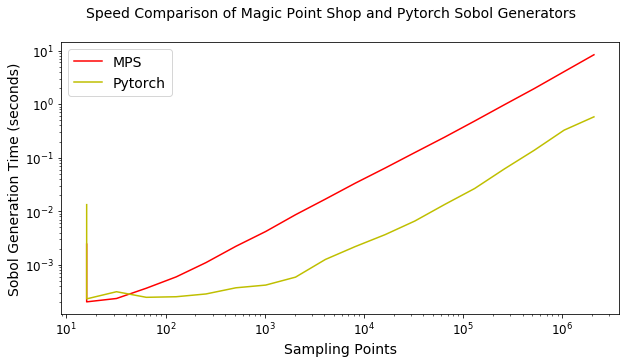

In [11]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
n = df_sobol_backends.n
# Lattice Plot
ax.loglog(n, df_sobol_backends['Sobol_MPS_time'], label='MPS', color='r')
ax.loglog(n, df_sobol_backends['Sobol_Pytorch_time'], label='Pytorch', color='y')
ax.legend(loc='upper left')
ax.set_xlabel('Sampling Points')
ax.set_ylabel('Sobol Generation Time (seconds)')
# Metas and Export
fig.suptitle('Speed Comparison of Magic Point Shop and Pytorch Sobol Generators')
plt.savefig('../outputs/lds_sequences/sobol_mps_vs_pytorch.png', dpi=200)

While Magic Point Shop Sobol has a lower initialization time, Pytorch Sobol is consistently faster to generate samples. 